In [9]:
import sys
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
%%time
Ps = [1, 2, 4, 8]
cmd = ['mpiexec', '-n', None, sys.executable, 'n-body-mpi.py']
runtimes = []
for P in Ps:
    print("running", P, end=" ")
    cmd[2] = str(P+1)
    start = time.time()
    subprocess.call(cmd)
    stop = time.time()
    runtimes.append(stop - start)
    print(runtimes[-1])
print(runtimes)

running 1 4.7459166049957275
running 2 3.031688928604126
running 4 2.010626792907715
running 8 2.760524272918701
[4.7459166049957275, 3.031688928604126, 2.010626792907715, 2.760524272918701]
CPU times: user 8 ms, sys: 12 ms, total: 20 ms
Wall time: 12.6 s


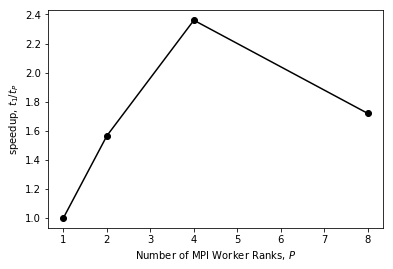

In [11]:
rts = runtimes[0] / np.array(runtimes) 
plt.plot(Ps, rts, 'ko-')
plt.xlabel('Number of MPI Worker Ranks, $P$')
plt.ylabel('speedup, $t_1/t_P$')
plt.savefig('n-body-mpi-speedup.svg')

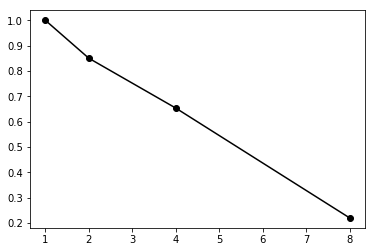

In [4]:
plt.plot(Ps, rts / Ps, 'ko-')

In [5]:
rts

array([1.        , 1.70045342, 2.61381244, 1.75976367])

In [6]:
rts[1:] / rts[:-1]

array([1.70045342, 1.53712675, 0.67325553])

Text(0,0.5,'Relative Double Speedup, $t_P/t_{\\frac{P}{2}}$')

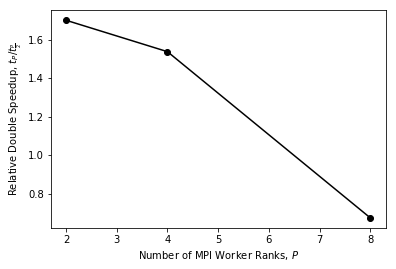

In [7]:
plt.plot(Ps[1:], rts[1:] / rts[:-1], 'ko-')
plt.xlabel('Number of MPI Worker Ranks, $P$')
plt.ylabel('Relative Double Speedup, $t_P/t_{\\frac{P}{2}}$')
#plt.savefig('n-body-mpi-double-speedup.svg')